### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=Warning)
%matplotlib inline
np.random.seed(11111111)

### Functions

In [29]:
def softmax(w):
    a = np.exp(w)
    return a / a.sum()

def return_risk_calculator(N, mean_return, cov, mode=0):
    returns = np.zeros(N)
    risks = np.zeros(N)
    for i in range(N):
        if mode==0:
            w = softmax(np.random.randn(2))
        elif mode==1:
            x = np.random.random()
            w = np.array([x, 1-x])
        elif mode==2:
            x = np.random.random() - 0.5
            w = np.array([x, 1-x])     # short selling enabled
        elif mode==3:
            x1, x2 = np.random.random(2) - 0.5
            w = np.array([x1, x2, 1 - x1 - x2])
            np.random.shuffle(w)
        ret = mean_return.dot(w)
        risk = np.sqrt(w.dot(cov).dot(w))
        returns[i] = ret
        risks[i] = risk
    return returns, risks

def scatter_plot(risks, returns):
    plt.scatter(risks, returns, alpha=0.1)
    plt.xlabel("Risk");
    plt.ylabel("Return");

### Code

In [2]:
mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [3]:
rho = 0.01 * np.random.randn()
rho

0.007129547452251222

In [4]:
sigmas = np.exp(np.random.randn(2))
sigmas

array([2.83423006, 0.50425457])

In [5]:
cov = np.diag(sigmas**2)
cov

array([[8.03286002, 0.        ],
       [0.        , 0.25427267]])

In [6]:
sigma12 = sigmas[0] * sigmas[1] * rho
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[8.03286002, 0.01018936],
       [0.01018936, 0.25427267]])

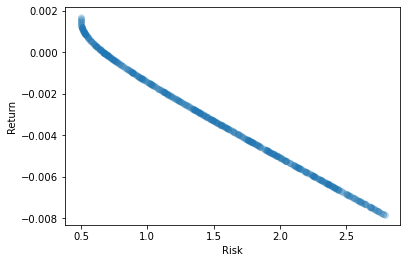

In [22]:
N=1000
returns, risks = return_risk_calculator(N, mean_return, cov)
scatter_plot(risks, returns)

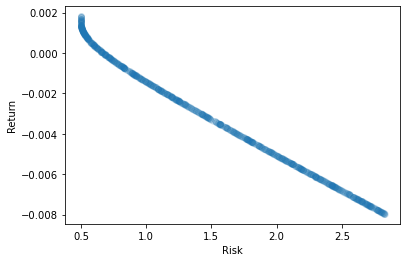

In [20]:
returns, risks = return_risk_calculator(N, mean_return, cov, 1)
scatter_plot(risks, returns)

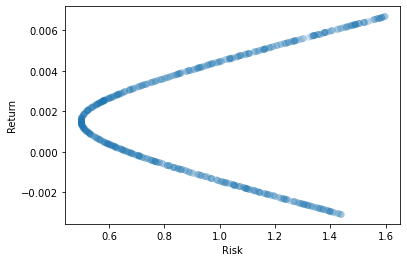

In [21]:
returns, risks = return_risk_calculator(N, mean_return, cov, 2)
scatter_plot(risks, returns)

### 3-Asset Portfolio

In [24]:
mean_return = 0.01 * np.random.randn(3)
mean_return

array([0.00756538, 0.00388483, 0.01115411])

In [26]:
sigmas = np.exp(np.random.randn(3))
sigmas

array([2.64386322, 8.39856203, 0.34146231])

In [27]:
rhos = 0.01 * np.random.randn(3)
rhos

array([7.14610861e-03, 2.93445780e-05, 7.22727244e-03])

In [28]:
cov = np.array([
    [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[2]],
    [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
    [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
])
cov

array([[6.99001272e+00, 1.58676835e-01, 2.64916874e-05],
       [1.58676835e-01, 7.05358442e+01, 2.07263167e-02],
       [2.64916874e-05, 2.07263167e-02, 1.16596507e-01]])

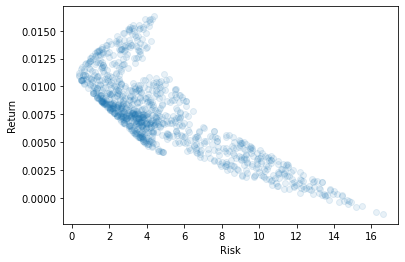

In [30]:
returns, risks = return_risk_calculator(N, mean_return, cov, 3)
scatter_plot(risks, returns)

### Max and Min Return

In [ ]:
# left